# Packages and Functions

In [1]:
import os
import importlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import json

import lib
# lib.algo_template.algo(data)
# getattr(getattr(lib, "algo_template"), "algo")(data)

# Configuration

In [6]:
# set default values for all plotting:
plt.rcParams['axes.titlesize']  = 14
plt.rcParams['axes.labelsize']  = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['lines.linewidth'] = 2

In [7]:
cfg = {}

cfg['results path trunk 1'] = "/home/kr/forschung/projects/aggrflex/results/processed_data/"

# cfg['results path trunk 2'] = "benchmark_host/kr-pc/"
# cfg['results path trunk 2'] = "testing/kr-nb3/"
# cfg['results path trunk 2'] = "testing/loos/"

# cfg['results dir list'] = ['algo_no_flex'    , 'algo_exact', 
#                            'algo_Barot_wo_pc', 'algo_Barot_w_pc']
# cfg['results dir list'] = ['various_algos']
# cfg['results dir list'] = ['various_algos_part_2']

if 1: # no_tail_half_end:
    cfg['results path trunk 2'] = "no_tail_half_end/loos/"
    # cfg['results dir list']     = [f"various_algos_part_{i}" for i in range(1,5)]
    cfg['results dir list']     = ["various_algos"]
    
if 0: # no_tail_zero_end:
    cfg['results path trunk 2'] = "no_tail_zero_end/loos/"
    cfg['results dir list']     = ["various_algos"]

if 0: # with_tail_zero_end:
    cfg['results path trunk 2'] = "with_tail_zero_end/loos/"
    cfg['results dir list']     = ["various_algos"]

# paths for outputs:
cfg['figures path'] = "/home/kr/forschung/projects/aggrflex/results/figures/"
cfg['tables path']  = "/home/kr/forschung/projects/aggrflex/results/tables/"

cfg['results path trunk 2']

'no_tail_half_end/loos/'

# Delete Results

In [29]:
cfg['results dir'] = f"{cfg['results dir list'][0]}/"
cfg['results path'] = cfg['results path trunk 1'] + \
                    cfg['results path trunk 2'] + \
                    cfg['results dir']
if 0:
    with open(cfg['results path'] + 'cfg.json') as json_file:
        cfg = json.load(json_file)
    del cfg['algos']['Zonotopes']
    with open(cfg['results path'] + 'cfg.json', 'w') as outfile:
        json.dump(cfg, outfile, indent=2)
if 0:
    with open(cfg['results path'] + 'res.pickle', 'rb') as handle:
        res = pickle.load(handle)
    ind = res['algo'] == 'Zonotopes'
    res.drop(res.loc[ind,].index, inplace=True)
    with open(cfg['results path'] + 'res.pickle', 'wb') as handle:
        pickle.dump(res, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Import and Merge Results

In [8]:
res = pd.DataFrame()
cfg_list = []

for subdir in cfg['results dir list']:
    cfg['results dir'] = f"{subdir}/"
    cfg['results path'] = cfg['results path trunk 1'] + \
                          cfg['results path trunk 2'] + \
                          cfg['results dir']
    with open(cfg['results path'] + 'cfg.json') as json_file:
        cfg_algo = json.load(json_file)
        cfg_list.append(cfg_algo)
    with open(cfg['results path'] + 'res.pickle', 'rb') as handle:
        res_algo = pickle.load(handle)
    # res = res.concat(res_algo)  # deprecated method
    res = pd.concat( [res, res_algo], axis=0)

print(f"res data frame has shape: {res.shape}.")
print(f"res data frame has algos: {res['algo'].unique().tolist()}.")

res data frame has shape: (62200, 12).
res data frame has algos: ['no flexibility', 'exact', 'Barot wo. pc.', 'Barot w. pc.', 'Homothet Stage 0', 'Outer Battery Homothet', 'Inner Battery Homothet', 'Homothet Projection', 'Union of Homothets Stage 1', 'Zonotopes', 'Zonotopes l1', 'Zonotopes l2', 'Zhen Ellipsoid Inner', 'Barot Ellipsoid Inner'].


# Compute Quality Criteria

In [5]:
# reload local functions in lib directory:
importlib.reload(lib)
importlib.reload(lib.tools)

dsp = lib.tools.dsp_default()

In [6]:
importlib.reload(lib.tools)

# comp = {'algo':'Barot wo. pc.', 'quantity':'cost_value', 'view':'raw'}
# comp = {'algo':'Barot wo. pc.', 'quantity':'cost_value', 'view':'qual. crit.'}
comp = {'algo':'Barot wo. pc.', 'quantity':'cost_im_en', 'view':'raw'}
# comp = {'algo':'Barot wo. pc.', 'quantity':'algo_time', 'view':'raw'}
# comp = {'algo':'Homothet Stage 0',       'quantity':'cost_value', 'view':'qual. crit.'}
# comp = {'algo':'Homothet Stage 0',       'quantity':'peak_value', 'view':'qual. crit.'}
# comp = {'algo':'Zhen Ellipsoid Inner',       'quantity':'peak_value', 'view':'qual. crit.'}
# comp = {'algo':'Inner Battery Homothet', 'quantity':'cost_value', 'view':'qual. crit.'}
# comp = {'algo':'Homothet Projection',    'quantity':'cost_value', 'view':'qual. crit.'}
# comp = {'algo':'Klaus inner span',    'quantity':'cost_value', 'view':'qual. crit.'}
# comp = {'algo':'Simple Inner',    'quantity':'cost_value', 'view':'qual. crit.'}

df = lib.tools.target_df(dsp, comp, res)   # sorted by dsp['c4c']

# -------- checks:
# df['target'].describe()
# df['target'].hist();
# res.to_excel('/home/kr/scratch/res.xlsx')
df

,periods,households,day,sample,target
0,4.0,2.0,2016-01-15,0.0,0.000000
1,4.0,2.0,2016-01-15,1.0,0.000000
2,4.0,2.0,2016-01-15,2.0,0.000000
3,4.0,2.0,2016-01-15,3.0,39.331503
4,4.0,2.0,2016-01-15,4.0,17.382966
...,...,...,...,...,...
5035,24.0,50.0,2016-12-15,5.0,163.446367
5036,24.0,50.0,2016-12-15,6.0,202.018984
5037,24.0,50.0,2016-12-15,7.0,189.751528
5038,24.0,50.0,2016-12-15,8.0,177.083026


# Figures

In [18]:
# reload local functions in lib directory:
importlib.reload(lib)
importlib.reload(lib.tools)

dsp = lib.tools.dsp_default()

## Analyse One Algorithm 

In [32]:
sel = {}

# sel['algo'] = 'no flexibility'
# sel['algo'] = 'exact'
# ---------------------------------------------
# sel['algo'] = 'Barot wo. pc.'               # outer
sel['algo'] = 'Barot w. pc.'                # outer

# sel['algo'] = 'Outer Battery Homothet'      # outer
# sel['algo'] = 'Homothet Stage 0'            # inner
# sel['algo'] = 'Inner Battery Homothet'      # inner
sel['algo'] = 'Homothet Projection'         # inner

# sel['algo'] = 'Union of Homothets Stage 1'  # inner
# sel['algo'] = 'Zonotopes'                   # inner
# sel['algo'] = 'Zhen Ellipsoid Inner'        # inner
# sel['algo'] = 'Barot Ellipsoid Inner'       # inner
# ---------------------------------------------
# sel['algo'] = 'Klaus inner span' # inner
# sel['algo'] = 'Simple Inner' # inner

if dsp['algo type'][sel['algo']] == 'inner':
    sel['quantities'] = {'cost_value':'qual. crit.',
                         # 'peak_value':'qual. crit.',
                         'algo_time' :'raw',
                         # 'cost_time' :'raw'
                        }
elif dsp['algo type'][sel['algo']] == 'outer':
    sel['quantities'] = {'cost_im_en':'qual. crit.',
                         # 'peak_im_en':'qual. crit.',
                         'algo_time' :'raw',
                         # 'cost_time' :'raw'
                        }
else:
    sel = {}

sel['periods list'] = cfg_list[0]['periods list']
# sel['periods list'] = [2, 10]

sel['households list'] = cfg_list[0]['households list']
# sel['households list'] = [5, 20]

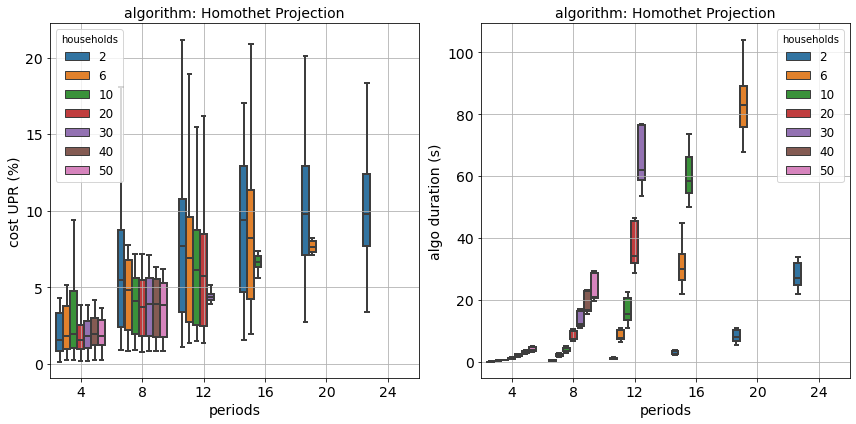

In [33]:
# figure structure:
if len(sel['quantities']) > 1:
    # nrows = int(np.ceil(len(sel['quantities'])/2))
    # fig, ax_ = plt.subplots(nrows=nrows, ncols=2, figsize=(14, 6*nrows))
    
    ncols = len(sel['quantities'])
    fig, ax_ = plt.subplots(nrows=1, ncols=ncols, figsize=(6*ncols, 6))
    
else:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
    ax_ = [ax]

# subplots:
counter = 0
for quantity, view in sel['quantities'].items():
    comp = {'algo':sel['algo'], 'quantity':quantity, 'view':view }
    df = lib.tools.target_df(dsp, comp, res)
    
    if df is not None:
        df.rename(columns={'target':quantity}, inplace=True)

        # slice to selection:
        ind = df['periods'].isin(sel['periods list']) & df['households'].isin(sel['households list'])
        df = df.loc[ind,]

        # cat periods and households values to integer:
        df['periods'] = df['periods'].astype(int)
        df['households'] = df['households'].astype(int)

        # boxplots:
        ax = ax_.flatten()[counter]
        sns.boxplot(ax=ax, x='periods', hue="households", y=quantity, data=df, 
                    showmeans=False, showfliers=False) # showfliers=outliers
        # sns.violinplot(ax=ax, x='periods', hue="households", y=quantity, data=df)
        ax.set_ylabel( dsp['quantity label'][quantity][view] )
        ax.grid(True)
        # ax.set_title(f"algo = {sel['algo']}, type = {dsp['algo type'][sel['algo']]}")
        ax.set_title(f"algorithm: {sel['algo']}")
        
    counter += 1
plt.tight_layout()

# save figure:
plt.savefig(cfg['figures path'] + sel['algo'] + ".pdf")

### Scratch

413.26254382542925

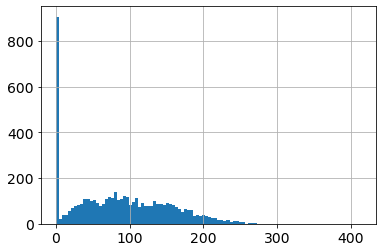

In [18]:
comp = {'algo':'Barot wo. pc.', 'quantity':'cost_im_en', 'view':'qual. crit.' }
comp = {'algo':'Homothet Stage 0', 'quantity':'peak_value', 'view':'qual. crit.' }
df = lib.tools.target_df(dsp, comp, res)

# checks:
df['target'].hist(bins=100);
df['target'].min()
df['target'].max()

## Compare Some Algorithms over Settings

In [9]:
sel = {}

if 0: # outer
    sel['algos']    = ['Barot wo. pc.', 'Barot w. pc.', 'Outer Battery Homothet'] 
    
    sel['quantity'] = 'cost_im_en'
    sel['view']     = 'qual. crit.'
    
    sel['quantity'] = 'algo_time'
    sel['view']     = 'raw'
    
    sel['serial param'] = 'periods'
    sel['fix param'] = 'households'
    sel['fix value'] = 20
    
    sel['aggfunc']   = np.median
    
else: # inner
    sel['algos']    = ['Homothet Stage 0', 'Inner Battery Homothet', 'Homothet Projection',
                       # 'Zonotopes',
                       'Union of Homothets Stage 1', 'Zhen Ellipsoid Inner', 'Barot Ellipsoid Inner']
    
    sel['quantity'] = 'cost_value'
    sel['view']     = 'qual. crit.'
    
    sel['quantity'] = 'algo_time'
    sel['view']     = 'raw'
    
    sel['serial param'] = 'periods'
    sel['fix param'] = 'households'
    sel['fix value'] = 20
    
    sel['serial param'] = 'households'
    sel['fix param'] =  'periods'
    sel['fix value'] = 12
    
    sel['aggfunc']   = np.median
    
counter = 0
comp = sel
for algo in sel['algos']:
    comp['algo'] = algo
    if counter == 0:
        df = lib.tools.target_df(dsp, comp, res)
        df
        df.rename(columns={"target": algo}, inplace=True)
    else:
        df_add = lib.tools.target_df(dsp, comp, res)
        df[algo] = df_add['target']
    counter += 1  

ind = df[sel['fix param']] == sel['fix value']
cols = [sel['serial param']] + sel['algos']
rf = df.loc[ind, cols].groupby(by=[sel['serial param']]).aggregate(sel['aggfunc'])
rf.index = rf.index.map(int)

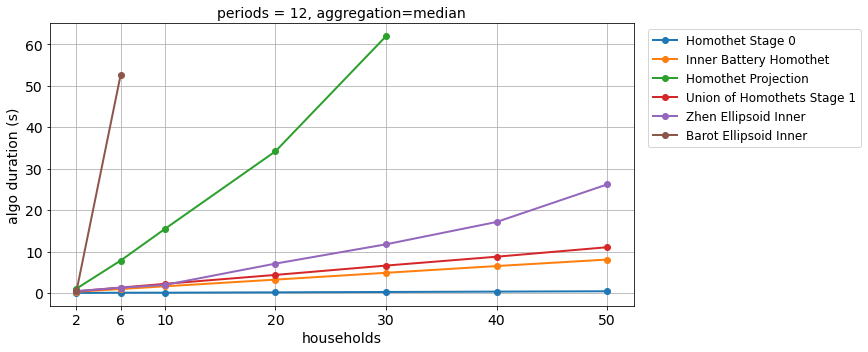

In [29]:
ylabel = dsp['quantity label'][sel['quantity']][sel['view']]
title  = f"{sel['fix param']} = {sel['fix value']}, aggregation={sel['aggfunc'].__name__}"
rf.plot(figsize=(9,5), grid=True, ylabel=ylabel, title=title, 
        style='o-', xticks=rf.index)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.40, 1));


plt.savefig(cfg['figures path'] + "algo_comparison" + ".pdf")

### Scratch

-4.263256414560601e-14

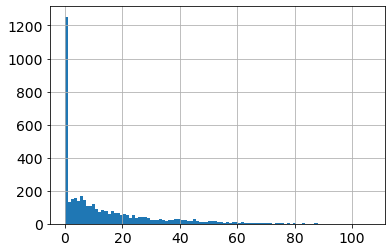

In [21]:
# comp = {'algo':'no flexibility', 'quantity':'peak_value', 'view':'raw' }
# comp = {'algo':'no flexibility', 'quantity':'cost_value', 'view':'raw' }
# comp = {'algo':'Homothet Stage 0', 'quantity':'peak_value', 'view':'raw' }
comp = {'algo':'Zonotopes', 'quantity':'peak_value', 'view':'raw' }
# comp = {'algo':'Zonotopes', 'quantity':'cost_value', 'view':'raw' }
df1 = lib.tools.target_df(dsp, comp, res)

comp = {'algo':'exact',     'quantity':'peak_value', 'view':'raw' }
# comp = {'algo':'exact',     'quantity':'cost_value', 'view':'raw' }
df2 = lib.tools.target_df(dsp, comp, res)

(df1['target'] - df2['target']).hist(bins=100);

(df1['target'] - df2['target']).max()
(df1['target'] - df2['target']).min()

## Compare All Algorithms for Fixed Setting

In [4]:
# reload local functions in lib directory:
importlib.reload(lib)
importlib.reload(lib.tools)

dsp = lib.tools.dsp_default()

In [5]:
# setting: fix N-M-setting and choose algo type:
stg = {}

if 0: # inner:
    stg = {'periods'   : 12, 
           'households': 10,
           'algo_type' : 'inner',
           'quantity'  : 'cost_value'  # qual crit are used
           # 'quantity'  : 'peak_value'
          }
else: # outer:
    stg = {'periods'   : 16, 
           'households': 20,
           'algo_type' : 'outer',
           'quantity'  : 'cost_im_en'
           # 'quantity' : 'peak_im_en'
          }

pf = lib.tools.pareto(stg, res)
pf

NameError: name 'res' is not defined

In [24]:
s = pf.style.format(precision=2)
print(s.to_latex())

\begin{tabular}{lrr}
 & unused (costs) (%) & algo time (seconds) \\
 &  &  \\
Homothet Projection & 4.12 & 3.62 \\
Union of Homothets Stage 1 & 6.85 & 1.38 \\
Zonotopes l1 & 7.73 & 0.74 \\
Inner Battery Homothet & 8.07 & 0.76 \\
Homothet Stage 0 & 8.77 & 0.08 \\
Zonotopes l2 & 8.97 & 0.73 \\
Zonotopes & 10.89 & 2.48 \\
Zhen Ellipsoid Inner & 27.75 & 1.10 \\
Barot Ellipsoid Inner & 29.00 & 75.39 \\
\end{tabular}



# Tables

## One Algorithm

In [73]:
sel = {}

# sel['algo'] = 'no flexibility'
# sel['algo'] = 'exact'
# ---------------------------------------------
# sel['algo'] = 'Barot wo. pc.'               # outer
# sel['algo'] = 'Barot w. pc.'                # outer
# sel['algo'] = 'Outer Battery Homothet'      # outer

# sel['algo'] = 'Homothet Stage 0'            # inner
# sel['algo'] = 'Inner Battery Homothet'      # inner
# sel['algo'] = 'Homothet Projection'         # inner
# sel['algo'] = 'Union of Homothets Stage 1'  # inner
# sel['algo'] = 'Zonotopes'                   # inner
# sel['algo'] = 'Zhen Ellipsoid Inner'        # inner
# sel['algo'] = 'Barot Ellipsoid Inner'       # inner
# ---------------------------------------------

sel['aggfunc']   = np.median

if 1: # outer
    sel['algo'] = 'Barot w. pc.'
    
    sel['quantity'] = 'cost_im_en'
    # sel['quantity'] = 'peak_im_en'
    
    sel['view']     = 'qual. crit.'
        
elif 1: # inner
    
    sel['algo'] = 'Homothet Projection'
    
    sel['quantity'] = 'cost_value'
    # sel['quantity'] = 'peak_value'
    
    sel['view']     = 'qual. crit.'
    
else:
    sel['quantity'] = 'algo_time'
    sel['view']     = 'raw'
    

df = lib.tools.target_df(dsp, sel, res)
tf = pd.pivot_table(data=df, values='target', index='households', columns='periods', 
                    aggfunc=sel['aggfunc'])
tf.index = tf.index.map(int)
tf.columns = tf.columns.map(int)
tf = tf.round(2)  # rounding!!!
tf

periods,4,8,12,16,20,24
households,,,,,,
2,0.0,0.0,0.00,0.00,0.00,1.30
6,0.0,0.0,0.00,4.17,10.75,11.20
10,0.0,0.0,0.00,14.96,21.46,18.64
20,0.0,0.0,5.81,34.77,36.06,39.78
30,0.0,0.0,11.16,48.05,50.52,62.78
40,0.0,0.0,19.93,79.21,70.50,83.01
50,0.0,0.0,26.68,99.57,88.32,103.47


In [37]:
# export table:
# print(tf.style.to_latex())
# tf.to_latex('mytable.tex')

s = tf.style.format(precision=2)
print(s.to_latex())

\begin{tabular}{lrrrrrr}
periods & 4 & 8 & 12 & 16 & 20 & 24 \\
households &  &  &  &  &  &  \\
2 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 1.30 \\
6 & 0.00 & 0.00 & 0.00 & 4.17 & 10.75 & 11.20 \\
10 & 0.00 & 0.00 & 0.00 & 14.96 & 21.46 & 18.64 \\
20 & 0.00 & 0.00 & 5.81 & 34.77 & 36.06 & 39.78 \\
30 & 0.00 & 0.00 & 11.16 & 48.05 & 50.52 & 62.78 \\
40 & 0.00 & 0.00 & 19.93 & 79.21 & 70.50 & 83.01 \\
50 & 0.00 & 0.00 & 26.68 & 99.57 & 88.32 & 103.47 \\
\end{tabular}



In [38]:
s.to_latex('~/scratch/mytable.tex')